<a href="https://colab.research.google.com/github/vashic/Object-Detection/blob/master/TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pjreddie/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 5907, done.
remote: Total 5907 (delta 0), reused 0 (delta 0), pack-reused 5907
Receiving objects: 100% (5907/5907), 6.32 MiB | 23.81 MiB/s, done.
Resolving deltas: 100% (3923/3923), done.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-11 07:10:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   301KB/s    in 16m 12s 

2020-06-11 07:27:06 (249 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

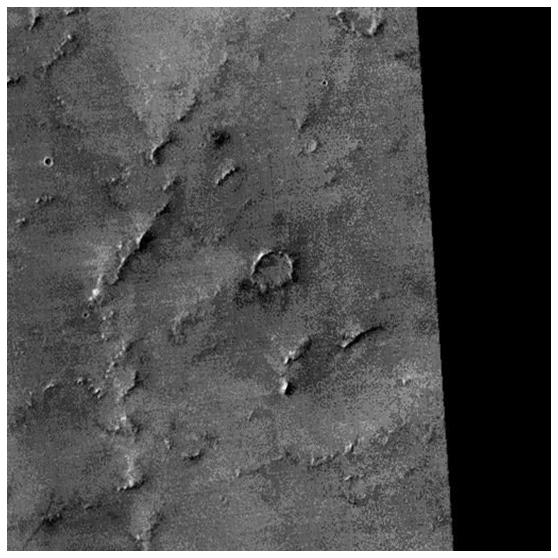

In [ ]:
imShow('predictions.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/YOLO_files /content/check
!ls /content/check

backup	      obj.data	 test.txt.gdoc	yolov3.cfg
imchip_7.jpg  obj.names  train.txt	yolov3_final.weights


In [ ]:
!mkdir /content/darknet/data/obj

In [ ]:
!cp /content/drive/My\ Drive/datasetImages/* /content/darknet/data/obj

In [ ]:
import os

image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
%pwd

'/content/darknet'

In [ ]:
!cp ../drive/My\ Drive/YOLO_files/obj.data data/
!cp ../drive/My\ Drive/YOLO_files/obj.names data/
!cp ../drive/My\ Drive/YOLO_files/yolov3.cfg cfg/

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg ../check/backup/yolov3_900.weights


yolov3
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   512 x 512 x   3   ->   512 x 512 x  32  0.453 BFLOPs
    1 conv     64  3 x 3 / 2   512 x 512 x  32   ->   256 x 256 x  64  2.416 BFLOPs
    2 conv     32  1 x 1 / 1   256 x 256 x  64   ->   256 x 256 x  32  0.268 BFLOPs
    3 conv     64  3 x 3 / 1   256 x 256 x  32   ->   256 x 256 x  64  2.416 BFLOPs
    4 res    1                 256 x 256 x  64   ->   256 x 256 x  64
    5 conv    128  3 x 3 / 2   256 x 256 x  64   ->   128 x 128 x 128  2.416 BFLOPs
    6 conv     64  1 x 1 / 1   128 x 128 x 128   ->   128 x 128 x  64  0.268 BFLOPs
    7 conv    128  3 x 3 / 1   128 x 128 x  64   ->   128 x 128 x 128  2.416 BFLOPs
    8 res    5                 128 x 128 x 128   ->   128 x 128 x 128
    9 conv     64  1 x 1 / 1   128 x 128 x 128   ->   128 x 128 x  64  0.268 BFLOPs
   10 conv    128  3 x 3 / 1   128 x 128 x  64   ->   128 x 128 x 128  2.416 BFLOPs
   11 res    8                

In [ ]:
!./darknet detect cfg/yolov3.cfg  /content/check/yolov3_final.weights /content/check/imchip_7.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   512 x 512 x   3   ->   512 x 512 x  32  0.453 BFLOPs
    1 conv     64  3 x 3 / 2   512 x 512 x  32   ->   256 x 256 x  64  2.416 BFLOPs
    2 conv     32  1 x 1 / 1   256 x 256 x  64   ->   256 x 256 x  32  0.268 BFLOPs
    3 conv     64  3 x 3 / 1   256 x 256 x  32   ->   256 x 256 x  64  2.416 BFLOPs
    4 res    1                 256 x 256 x  64   ->   256 x 256 x  64
    5 conv    128  3 x 3 / 2   256 x 256 x  64   ->   128 x 128 x 128  2.416 BFLOPs
    6 conv     64  1 x 1 / 1   128 x 128 x 128   ->   128 x 128 x  64  0.268 BFLOPs
    7 conv    128  3 x 3 / 1   128 x 128 x  64   ->   128 x 128 x 128  2.416 BFLOPs
    8 res    5                 128 x 128 x 128   ->   128 x 128 x 128
    9 conv     64  1 x 1 / 1   128 x 128 x 128   ->   128 x 128 x  64  0.268 BFLOPs
   10 conv    128  3 x 3 / 1   128 x 128 x  64   ->   128 x 128 x 128  2.416 BFLOPs
   11 res    8                 128 x 

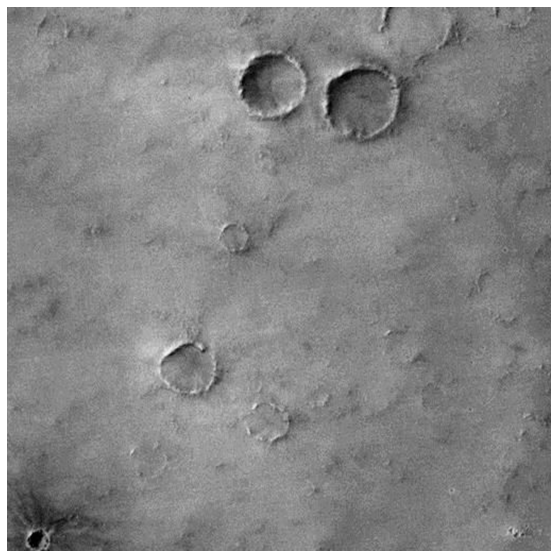

In [ ]:
imShow('predictions.jpg')